In [1]:
import sys
sys.path.insert(0, './ml')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml.gs_svm import grid_search
from ml.SVM_RF import run as run_model

from features.spatial_features_calc import get_spatial_features_names
from features.morphological_features_calc import get_morphological_features_names
from features.temporal_features_calc import get_temporal_features_names
import ML_util

In [2]:
chunks = [0, 500, 200]
modalities = ['spatial', 'morphological', 'temporal', 'spat_tempo']
restrictions = ['complete', 'no_small_sample']

min_gamma = -9
max_gamma = -1
num_gamma = 9
min_c = 0
max_c = 6
num_c = 7
kernel = 'rbf'
n = 5

In [3]:
def get_modality_results(data_path):
    accs, pyr_accs, in_accs = [], [], []
    
    _, acc, pyr_acc, in_acc, C, gamma = grid_search(data_path + "/0_0.60.20.2/", False, None, min_gamma,
                                                    max_gamma, num_gamma, min_c, max_c, num_c, kernel, n)
    accs.append(acc)
    pyr_accs.append(pyr_acc)
    in_accs.append(in_acc)
    
    restriction, modality = data_path.split('/')[-2:]
    
    if modality == 'temporal':
        accs = accs * len(chunks)
        pyr_accs = pyr_accs * len(chunks)
        in_accs = in_accs * len(chunks)
    else:
        for chunk_size in chunks[1:]:
            _, acc, pyr_acc, in_acc = run_model('svm', None, None, None, False, None, False, True, False, gamma, C, 'rbf',
                None, None, None, None, data_path + f"/{chunk_size}_0.60.20.2/")
            accs.append(acc)
            pyr_accs.append(pyr_acc)
            in_accs.append(in_acc)
        
        
    df = pd.DataFrame({'restriction': restriction, 'modality': modality, 'chunk_size': chunks,
                           'accs': accs, 'pyr_accs': pyr_accs, 'in_accs': in_accs})
    
    return df
                                       
def get_folder_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for modality in modalities:
        modaility_df = get_modality_results(data_path + '/' + modality)
        df = df.append(modaility_df, ignore_index=True)
        
    return df

def get_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for restriction in restrictions:
        folder_df = get_folder_results(data_path + '/' + restriction)
        df = df.append(folder_df, ignore_index=True)
        
    return df    

In [4]:
results = get_results('./data_sets')

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 306 (59.766%) consisting of 306 waveforms (59.766%)
Total number of pyramidal clusters in train data is 246 (80.392%) consisting of 246 waveforms (80.392%)
Total number of interneurons clusters in train data is 60 (19.608%) consisting of 60 waveforms (19.608%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 102 (19.922%) consisting of 102 waveforms (19.922%)
Total number of pyramidal clusters in dev data is 82 (80.392%) consisting of 82 waveforms (80.392%)
Total number of interneurons clusters in dev data is 20 (19.608%) consisting of 20 waveforms (19.608%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 104 (20.312%) consisting of 104 waveforms (20.312%)
Total number of pyramidal clusters in test data is

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .

[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.866, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.817, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.877, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.901, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.841, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.854, total=   0.0s
[CV] C

[CV] ............... C=1000.0, gamma=1e-09, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-05, score=0.938, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.841, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.817, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.854, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.951, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.963, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.854, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .

[CV] ............... C=100000.0, gamma=0.1, score=0.914, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.914, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.829, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.805, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.817, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.901, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.877, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   11.2s finished


Fitting took 12.95 seconds
Evaluating predictions...
Number of correct classified clusters is 83, which is 79.8077%
Number of correct classified chunks is 7787, which is 70.4961%
Test set consists of 83 pyramidal cells and 21 interneurons
80.7229% of pyramidal cells classified correctly
76.1905% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/complete/spatial/200_0.60.20.2/...
Total number of clusters in train data is 306 (59.766%) consisting of 71270 waveforms (61.740%)
Total number of pyramidal clusters in train data is 246 (80.392%) consisting of 20067 waveforms (28.156%)
Total number of interneurons clusters in train data is 60 (19.608%) consisting of 51203 waveforms (71.844%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 102 (19.922%) consisting of 16465 waveforms (14.263%)
Total number of pyramidal clusters in dev data is 82 (80.392%) consisting of

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.802, total=   0.0s
[CV] 

[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.988, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.963, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.976, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.975, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.988, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.963, total=   0.0s
[CV] C

[CV] ............... C=1000.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.988, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.951, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.988, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.951, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.976, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.963, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.207, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.268, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-07, score=0.975, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.988, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.939, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.988, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.976, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    3.7s finished


Fitting took 2.46 seconds
Evaluating predictions...
Number of correct classified clusters is 103, which is 99.0385%
Number of correct classified chunks is 10577, which is 95.7541%
Test set consists of 83 pyramidal cells and 21 interneurons
100.0000% of pyramidal cells classified correctly
95.2381% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/complete/morphological/200_0.60.20.2/...
Total number of clusters in train data is 306 (59.766%) consisting of 71270 waveforms (61.740%)
Total number of pyramidal clusters in train data is 246 (80.392%) consisting of 20067 waveforms (28.156%)
Total number of interneurons clusters in train data is 60 (19.608%) consisting of 51203 waveforms (71.844%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 102 (19.922%) consisting of 16465 waveforms (14.263%)
Total number of pyramidal clusters in dev data is 82 (80.392%) consi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.195, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .

[CV] .............. C=1000.0, gamma=0.0001, score=0.890, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.939, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.901, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.889, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.951, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.890, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.939, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.939, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.901, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.889, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.195, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.195, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.195, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] .

[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.939, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.939, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.889, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.877, total=   0.1s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.963, total=   0.8s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.939, total=   0.7s
[CV] C

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-09, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .

[CV] ................. C=10.0, gamma=1e-05, score=0.805, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.805, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.805, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.802, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.802, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.915, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.829, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.195, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=0.001, score=0.988, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.926, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.951, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.854, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.902, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.988, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.938, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-08, score=0.927, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.878, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.951, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.914, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.889, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] ............ C=1000000.0, gamma=1e-07, score=0.927, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] ............ C=1000000.0, gamma=1e-07, score=0.902, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    5.4s finished


Fitting took 23.43 seconds
Evaluating predictions...
Number of correct classified clusters is 100, which is 96.1538%
Number of correct classified chunks is 10595, which is 95.9171%
Test set consists of 83 pyramidal cells and 21 interneurons
95.1807% of pyramidal cells classified correctly
100.0000% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/complete/spat_tempo/200_0.60.20.2/...
Total number of clusters in train data is 306 (59.766%) consisting of 71270 waveforms (61.740%)
Total number of pyramidal clusters in train data is 246 (80.392%) consisting of 20067 waveforms (28.156%)
Total number of interneurons clusters in train data is 60 (19.608%) consisting of 51203 waveforms (71.844%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 102 (19.922%) consisting of 16465 waveforms (14.263%)
Total number of pyramidal clusters in dev data is 82 (80.392%) consist

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-05, score=0.278, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.574, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.259, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.259, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.722, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.278, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.852, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-07, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-09, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.278, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.278, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.278, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .

[CV] ............ C=100000.0, gamma=0.0001, score=0.907, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.815, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.907, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.833, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.907, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.870, total=   0.1s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.852, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    4.0s finished


Fitting took 64.60 seconds
Evaluating predictions...
Number of correct classified clusters is 61, which is 88.4058%
Number of correct classified chunks is 7207, which is 82.5166%
Test set consists of 50 pyramidal cells and 19 interneurons
88.0000% of pyramidal cells classified correctly
89.4737% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/spatial/200_0.60.20.2/...
Total number of clusters in train data is 202 (59.587%) consisting of 65305 waveforms (58.598%)
Total number of pyramidal clusters in train data is 148 (73.267%) consisting of 17040 waveforms (26.093%)
Total number of interneurons clusters in train data is 54 (26.733%) consisting of 48265 waveforms (73.907%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 68 (20.059%) consisting of 24244 waveforms (21.754%)
Total number of pyramidal clusters in dev data is 50 (73.529%) consist

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=1.0, gamma=0.0001, score=0.278, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.981, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.944, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.981, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.963, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ................... C=1.0, gamma=0.01, score=0.981, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-07, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.981, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-07, score=0.981, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .............. C=10000.0, gamma=1e-07, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .............. C=10000.0, gamma=1e-07, score=0.944, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .............. C=10000.0, gamma=1e-07, score=0.981, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .............. C=10000.0, gamma=1e-07, score=0.963, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.981, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-06, score=0.981, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.981, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.981, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.981, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    1.4s finished


Grid search completed in 1.49 seconds, best parameters are:
{'C': 1.0, 'gamma': 0.1}

Starting evaluation on test set...
Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/morphological/500_0.60.20.2/...
Total number of clusters in train data is 202 (59.587%) consisting of 26056 waveforms (58.595%)
Total number of pyramidal clusters in train data is 148 (73.267%) consisting of 6767 waveforms (25.971%)
Total number of interneurons clusters in train data is 54 (26.733%) consisting of 19289 waveforms (74.029%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 68 (20.059%) consisting of 9678 waveforms (21.764%)
Total number of pyramidal clusters in dev data is 50 (73.529%) consisting of 2646 waveforms (27.340%)
Total number of interneurons clusters in dev data is 18 (26.471%) consisting of 7032 waveforms (72.660%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting o

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=0.001, score=0.833, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.852, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.926, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.870, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.870, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ................... C=1.0, gamma=0.01, score=0.833, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ................... C=1.0, gamma=0.01, score=0.870, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-07, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.259, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.722, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] .

[CV] ................. C=1000.0, gamma=0.1, score=0.926, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.278, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.278, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .

[CV] ............. C=100000.0, gamma=1e-07, score=0.926, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.926, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.870, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] ............. C=100000.0, gamma=1e-06, score=0.870, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] ............. C=100000.0, gamma=1e-06, score=0.907, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] ............. C=100000.0, gamma=1e-06, score=0.907, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] ............. C=100000.0, gamma=1e-06, score=0.889, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .

[CV] ........... C=1000000.0, gamma=0.0001, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.926, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.907, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.852, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.944, total=   0.2s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.926, total=   0.2s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Grid search completed in 3.53 seconds, best parameters are:
{'C': 100000.0, 'gamma': 0.001}

Starting evaluation on test set...
Loading data set from ./data_sets/no_small_sample/spat_tempo/0_0.60.20.2/...
Total number of clusters in train data is 202 (59.587%) consisting of 202 waveforms (59.587%)
Total number of pyramidal clusters in train data is 148 (73.267%) consisting of 148 waveforms (73.267%)
Total number of interneurons clusters in train data is 54 (26.733%) consisting of 54 waveforms (26.733%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 68 (20.059%) consisting of 68 waveforms (20.059%)
Total number of pyramidal clusters in dev data is 50 (73.529%) consisting of 50 waveforms (73.529%)
Total number of interneurons clusters in dev data is 18 (26.471%) consisting of 18 waveforms (26.471%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total n

[CV] ................. C=10.0, gamma=1e-06, score=0.278, total=   0.0s
[CV] C=10.0, gamma=1e-06 .............................................
[CV] ................. C=10.0, gamma=1e-06, score=0.278, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.741, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.741, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.741, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.278, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.278, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.741, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.278, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.278, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.741, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.741, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.944, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.926, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.259, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.259, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.259, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.722, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.722, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] .

[CV] ........... C=1000000.0, gamma=0.0001, score=0.926, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.907, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.944, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.944, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.907, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.944, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.907, total=   0.0s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    2.3s finished


Fitting took 5.45 seconds
Evaluating predictions...
Number of correct classified clusters is 67, which is 97.1014%
Number of correct classified chunks is 8602, which is 98.4887%
Test set consists of 50 pyramidal cells and 19 interneurons
98.0000% of pyramidal cells classified correctly
94.7368% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/spat_tempo/200_0.60.20.2/...
Total number of clusters in train data is 202 (59.587%) consisting of 65305 waveforms (58.598%)
Total number of pyramidal clusters in train data is 148 (73.267%) consisting of 17040 waveforms (26.093%)
Total number of interneurons clusters in train data is 54 (26.733%) consisting of 48265 waveforms (73.907%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 68 (20.059%) consisting of 24244 waveforms (21.754%)
Total number of pyramidal clusters in dev data is 50 (73.529%) consi

In [5]:
print(results)

        restriction       modality  chunk_size        accs    pyr_accs  \
0          complete        spatial         0.0   91.346154   97.590361   
1          complete        spatial       500.0   79.807692   80.722892   
2          complete        spatial       200.0   84.615385   84.337349   
3          complete  morphological         0.0   99.038462  100.000000   
4          complete  morphological       500.0   99.038462  100.000000   
5          complete  morphological       200.0   99.038462  100.000000   
6          complete       temporal         0.0   90.384615   90.361446   
7          complete       temporal       500.0   90.384615   90.361446   
8          complete       temporal       200.0   90.384615   90.361446   
9          complete     spat_tempo         0.0   89.423077   86.746988   
10         complete     spat_tempo       500.0   96.153846   95.180723   
11         complete     spat_tempo       200.0   96.153846   95.180723   
12  no_small_sample        spatial    

In [6]:
results = results.set_index(['restriction', 'modality', 'chunk_size'], append=True)  # create multi-index

In [7]:
results.to_csv('results_for_report.csv')

In [8]:
results

,,,,accs,pyr_accs,in_accs
,restriction,modality,chunk_size,,,
0,complete,spatial,0.0,91.346154,97.590361,66.666667
1,complete,spatial,500.0,79.807692,80.722892,76.190476
2,complete,spatial,200.0,84.615385,84.337349,85.714286
3,complete,morphological,0.0,99.038462,100.000000,95.238095
4,complete,morphological,500.0,99.038462,100.000000,95.238095
5,complete,morphological,200.0,99.038462,100.000000,95.238095
6,complete,temporal,0.0,90.384615,90.361446,90.476190
7,complete,temporal,500.0,90.384615,90.361446,90.476190
8,complete,temporal,200.0,90.384615,90.361446,90.476190


In [9]:
def get_num_cells(restriction):
    data_path = f"./data_sets/{restriction}/spatial/0_0.60.20.2/"
    train, dev, test, _, _, _ = ML_util.get_dataset(data_path)
    tot_n = len(train) + len(dev) + len(test)
    test_n = len(test)
    pyr_n = len([cell for cell in test if cell[0][-1] == 1])
    in_n = len([cell for cell in test if cell[0][-1] == 0])
    return tot_n, test_n, pyr_n, in_n

def autolabel(rects, ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    This function was taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    for rect in rects:
        height = rect.get_height()
        if height == 0:
            continue
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_results(df, restriction):
    tot_n, test_n, pyr_n, in_n = get_num_cells(restriction)
    
    labels = modalities
    
    zero = df.xs(0, level="chunk_size").accs
    five_hundred = df.xs(500, level="chunk_size").accs
    two_hundred = df.xs(200, level="chunk_size").accs

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (12, 12))
    rects1 = ax.bar(x - width, zero, width, label='chunk_size = 0')
    rects2 = ax.bar(x, five_hundred, width, label='chunk_size = 500')
    rects3 = ax.bar(x + width, two_hundred, width, label='chunk_size = 200')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (percentage)')
    ax.set_title(f"Scores by modality and chunk size; Total={tot_n}, Test={test_n}, PYR={pyr_n}, IN={in_n}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(rects1, ax)
    autolabel(rects2, ax)
    autolabel(rects3, ax)

    fig.tight_layout()

    plt.show()

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 306 (59.766%) consisting of 306 waveforms (59.766%)
Total number of pyramidal clusters in train data is 246 (80.392%) consisting of 246 waveforms (80.392%)
Total number of interneurons clusters in train data is 60 (19.608%) consisting of 60 waveforms (19.608%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 102 (19.922%) consisting of 102 waveforms (19.922%)
Total number of pyramidal clusters in dev data is 82 (80.392%) consisting of 82 waveforms (80.392%)
Total number of interneurons clusters in dev data is 20 (19.608%) consisting of 20 waveforms (19.608%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 104 (20.312%) consisting of 104 waveforms (20.312%)
Total number of pyramidal clusters in test data is

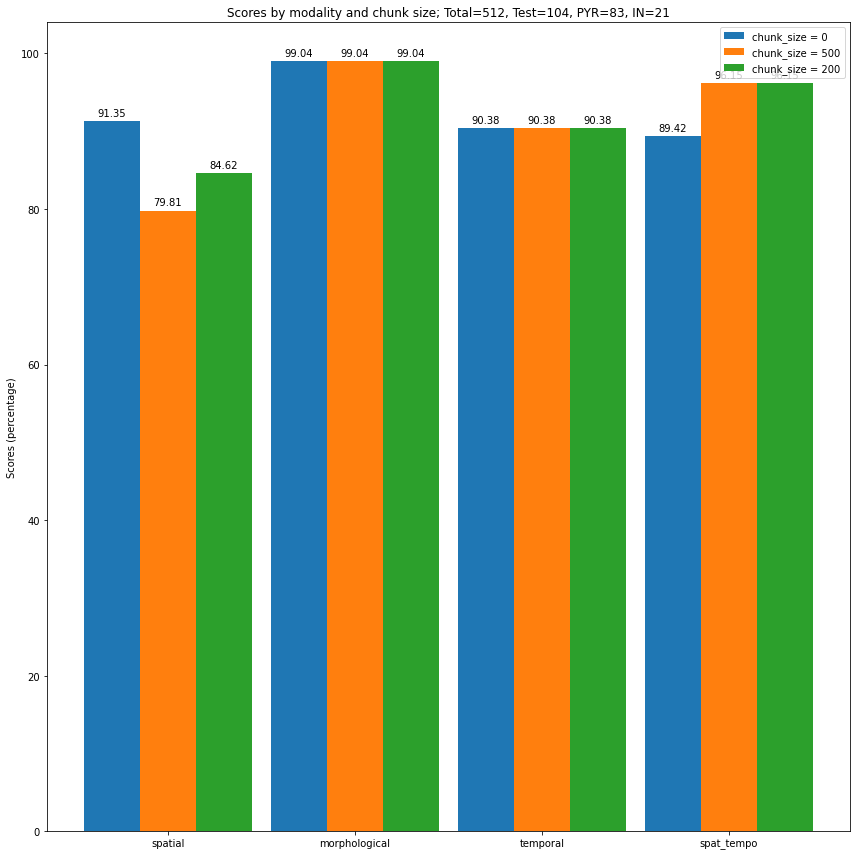

In [10]:
complete = results.loc[:, 'complete', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(complete, 'complete')

Loading data set from ./data_sets/no_small_sample/spatial/0_0.60.20.2/...
Total number of clusters in train data is 202 (59.587%) consisting of 202 waveforms (59.587%)
Total number of pyramidal clusters in train data is 148 (73.267%) consisting of 148 waveforms (73.267%)
Total number of interneurons clusters in train data is 54 (26.733%) consisting of 54 waveforms (26.733%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 68 (20.059%) consisting of 68 waveforms (20.059%)
Total number of pyramidal clusters in dev data is 50 (73.529%) consisting of 50 waveforms (73.529%)
Total number of interneurons clusters in dev data is 18 (26.471%) consisting of 18 waveforms (26.471%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 69 (20.354%) consisting of 69 waveforms (20.354%)
Total number of pyramidal clusters in test data

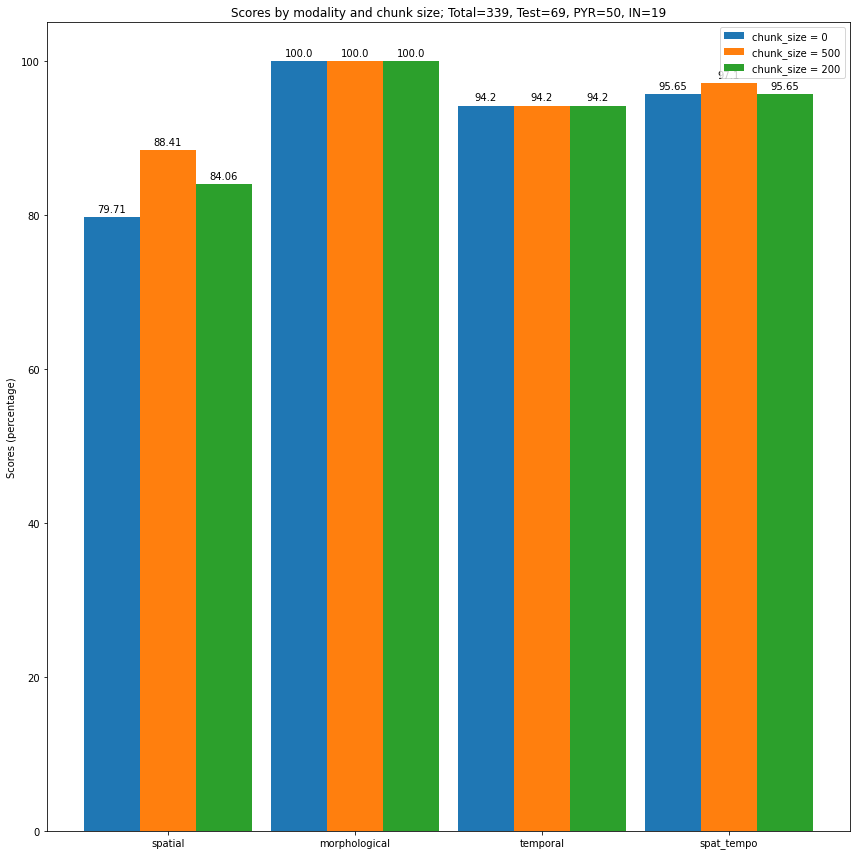

In [11]:
no_small_sample = results.loc[:, 'no_small_sample', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_small_sample, 'no_small_sample')